In [1]:
import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_grid(event=None):
    w = c.winfo_width() # Get current width of canvas
    h = c.winfo_height() # Get current height of canvas
    c.delete('grid_line') # Will only remove the grid_line

    # Creates all vertical lines at intevals of 100
    for i in range(0, w, 100):
        c.create_line([(i, 0), (i, h)], tag='grid_line')

    # Creates all horizontal lines at intevals of 100
    for i in range(0, h, 100):
        c.create_line([(0, i), (w, i)], tag='grid_line')

In [3]:
#root = tk.Tk()

#c = tk.Canvas(root, height=1600, width=900, bg='white')
#c.pack(fill=tk.BOTH, expand=True)
#c.bind('<Configure>', create_grid)

#root.mainloop()

In [4]:
class Cell:
    def __init__(self):
        self.possible_state = {'fire':3, 'forest':2, 'ash':1, 'empty':0}
        

In [5]:
class Grid:
    def __init__(self, SIZE = 11, p = 0.5):
        self._SIZE = SIZE
        self.state = {'fire':3, 'forest':2, 'ash':1, 'empty':0}
        self._p = p
        
        self._grid = np.random.choice(3, SIZE * SIZE, p=[1-p, 0, p]).reshape((SIZE, SIZE))
        self._grid[SIZE//2,SIZE//2] = self.state['fire']
        self._newGrid = np.copy(self._grid)
        
    def drawMe(self):
        plt.imshow(self._grid)
    
    def find_neighbours(self, position):
        l = position[0]
        c = position[1]
        neighbours = []
        if l > 0 and l < self._grid.shape[0]-1 and c > 0 and c < self._grid.shape[1]-1:
            neighbours = [[l-1,c-1], [l-1,c], [l-1,c+1], [l,c-1], [l,c+1], [l+1,c-1], [l+1,c], [l+1,c+1]]
        else:
            if l == 0 :
                if c == 0:
                    neighbours = [[l+1,c], [l+1,c+1], [l,c+1]]
                elif c == self._grid.shape[1]-1:
                    neighbours = [[l+1,c], [l+1,c-1], [l,c-1]]
                else:
                    neighbours = [[l+1,c], [l+1,c+1], [l,c+1], [l,c-1]]
            elif l == self._grid.shape[0]-1:
                if c == 0:
                    neighbours = [[l-11,c], [l-1,c+1], [l,c+1]]
                elif c == self._grid.shape[1]-1:
                    neighbours = [[l-11,c], [l-1,c-1], [l,c-1]]
                else:
                    neighbours = [[l-11,c], [l-1,c+1], [l,c+1], [l,c-1]]
            elif c == 0:
                neighbours = [[l-1,c], [l-1,c+1], [l,c+1], [l+1,c+1], [l+1,c]]
            else:
                neighbours = [[l-1,c], [l-1,c-1], [l,c-1], [l+1,c-1], [l+1,c]]
        return neighbours
    
    def is_fire_near(self, position):
        l = position[0]
        c = position[1]
        isFireNear = False
        for L,C in self.find_neighbours((l,c)):
            if self._grid[L,C] == self.state['fire']:
                isFireNear = True
                return isFireNear            
        return isFireNear
    def is_burning(self, position):
        l = position[0]
        c = position[1]
        isBurning = False
        if self._grid[l,c] == self.state['fire']:
            isBurning = True
        return isBurning
    
    def ignite(self, position):
        l = position[0]
        c = position[1]
        if self._grid[l,c] == self.state['forest']:
            self._newGrid[l,c] = self.state['fire']
    def turn_to_dust(self, position):
        l = position[0]
        c = position[1]
        self._newGrid[l,c] = self.state['ash']
    def switch_grid(self):
        self._grid = np.copy(self._newGrid)

In [6]:
class World:
    def __init__(self):
        self.grid = Grid()
        
    def one_step(self):
        for l in range(self.grid._SIZE):
            for c in range(self.grid._SIZE):
                position = (l,c)
                isBurning = self.grid.is_burning(position)
                if not isBurning:
                    isFireNear = self.grid.is_fire_near(position)
                    if isFireNear:
                        self.grid.ignite(position)
                else:
                    self.grid.turn_to_dust(position)
        self.grid.switch_grid()
        

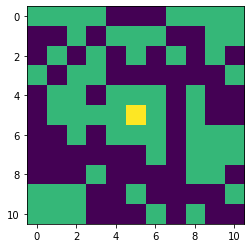

In [7]:
myW = World()
myW.grid.drawMe()

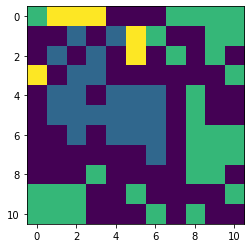

In [8]:
EPOCH = 5
for i in range(EPOCH):
    myW.one_step()
myW.grid.drawMe()